In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load datasets
completed_orders = pd.read_csv('/home/martin/Desktop/10-Academy/week-8/Causal-Inference/data/nb.csv')
delivery_requests = pd.read_csv('/home/martin/Desktop/10-Academy/week-8/Causal-Inference/data/driver_locations_during_request.csv')


In [37]:
# Inspect the first few rows of each dataset
print(completed_orders.head())
print(delivery_requests.head())


   Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37  
1  6.4280814653326,3.4721885847586  2021-07-01 06:38:04  2021-07-01 07:07:28  
2      6.508324099999999,3.3590397  2021-07-01 06:21:02  2021-07-01 07:02:23  
3      6.584881099999999,3.3614073  2021-07-01 07:16:07  2021-07-01 07:29:42  
4              6.4501069,3.3916154  2021-07-01 09:30:59  2021-07-01 09:34:36  
   id  order_id  driver_id driver_action       lat       lng  created_at  \
0   1    392001     243828      accepted  6.602207  3.270465         NaN   
1   2    392001     243588      rejected  6.592097  3.287445         NaN 

In [38]:
# Check for missing values
print(completed_orders.info())
print(delivery_requests.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non

In [39]:
# Handling missing values in completed_orders
print(completed_orders.isnull().sum())

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [40]:
# Drop rows with missing Trip Start Time and Trip End Time as these are critical for our analysis
completed_orders = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])

In [41]:
print(completed_orders.isnull().sum())

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64


In [42]:
completed_orders.head(10)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12
7,392013,"6.4308171,3.4341552","6.435460000000001,3.4846547",2021-07-01 08:44:09,2021-07-01 09:19:11
8,392014,"6.499156300000001,3.3585173","6.4280911,3.5157172",2021-07-01 06:43:07,2021-07-01 07:27:24
9,392017,"6.535043099999999,3.3316238","6.500039999999999,3.3248596",2021-07-01 06:49:37,2021-07-01 07:30:14


In [44]:
#Handling mising values in delivery_requests
print(delivery_requests.isnull().sum())

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [45]:
# Drop columns created_at and updated_at as these are critical for our analysis
delivery_requests = delivery_requests.drop(columns=['created_at', 'updated_at'])

In [46]:
print(delivery_requests.isnull().sum())

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64


In [47]:
completed_orders['Trip Start Time']= pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time']= pd.to_datetime(completed_orders['Trip End Time'])


In [48]:
# Calculate trip duration
completed_orders['Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time']).dt.total_seconds() / 60  # in minutes

In [49]:
# Detect outliers in Trip Duration using IQR
Q1 = completed_orders['Trip Duration'].quantile(0.25)
Q3 = completed_orders['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [50]:
# Filter out outliers
completed_orders = completed_orders[(completed_orders['Trip Duration'] >= lower_bound) & (completed_orders['Trip Duration'] <= upper_bound)]

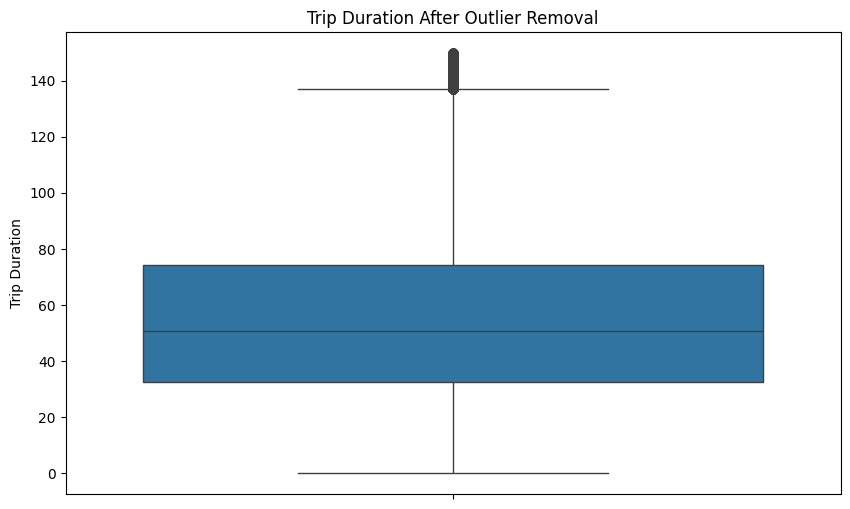

In [51]:
# Verify the removal of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(completed_orders['Trip Duration'])
plt.title('Trip Duration After Outlier Removal')
plt.show()

In [53]:
# Save the cleaned DataFrame to a CSV file
completed_orders.to_csv('cleaned_completed_orders.csv', index=False)
delivery_requests.to_csv('cleaned_delivery_requests.csv', index=False)
print("DataFrame has been saved to 'cleaned_completed_orders.csv and cleaned_delivery_requests.csv'")


DataFrame has been saved to 'cleaned_completed_orders.csv and cleaned_delivery_requests.csv'
